In [69]:
X<- scan('Practica/6/Datos/lamparas.txt')

# Estimador de Momentos
estimadorMomentos <- function(x){return (1/mean(x))}
theta_m <- estimadorMomentos(X)

#### EMV (igual al de momentos) ###
estimadorMV <- function(x){
    return (1/mean(x))
}
theta_MV <- estimadorMV(X)

# emv sin var
estimadorMediaMV <- function(x){
    n <- length(x)
    mu_hat <- sum(x)/n
    return (mu_hat)
}

# emv var sesgado
estimadorVarMV <- function(x){
    n <- length(x)
    mu_hat <- estimadorMediaMV(x)
    var_hat <- sum((x - mu_hat)**2)/n
    return (var_hat)
}

# emv var insesgado (s²)

estimadorVarMVInsesgado <- function(x){
    n <- length(x)
    mu_hat <- estimadorMediaMV(x)
    var_hat <- sum((x - mu_hat)**2)/(n-1)
    return (var_hat)
}

estimadorVarMVInsesgadoConMu <- function(x, mu){
    n <- length(x)
    var_hat <- sum((x - mu)**2)/(n-1)
    return (var_hat)
}


# cat("EMV:", estimadorMV(X))
cat("\nEMV Media sin var:",estimadorMediaMV(X))
cat("\nMedia:",mean(X))
cat("\nEMV var sesgado:", estimadorVarMV(X))
cat("\nEMV var insesgado:", estimadorVarMVInsesgado(X))
cat("\nEMV var insesgado con mu:", estimadorVarMVInsesgadoConMu(X, mu=12))
cat("\nDesvio muestral ≡ Desvio Muestral:",sqrt(var(X)))
cat("\nMAD:", median(abs(X-median(X))))
cat("\nSin usar dato de la media conocida (var(X)):", var(X))
cat("\n\nVarianza del error de medición ≡ Varianza que vemos en los datos
OBS: Los datos no tienen varianza, la varianza observada en ellos corresponde completamente al error de medición.\n")
cat("\n\nDa los percentiles 0% (min), 25%, 50%, 75% y 100% (max)
              percentiles:", quantile(X))
cat("\nPercentiles 10% y 90%:", quantile(X, 0.1), quantile(X,0.9))
cat("\nLargo X:", length(X))
cat("\na mano el percentil 90% se consigue buscando la posici�n =0.9 * 27=24.3\n",sort(X)[23],sort(X)[24],
    sort(X)[23]*0.1 + sort(X)[24]*0.9)
cat("\n Rango muestral:", range(X))
cat("\n IC:", quantile(X,0.75)-quantile(X,0.25))


## Percentil 90 usando modelo ##
estimadorPercentil90 <- function(theta_hat){
    return (-log(0.1)/theta_hat)
}

k_hat <- estimadorPercentil90(theta_m)
k_hat

## Percentil 90 sin modelo ##
sort(X)
# Cantidad de datos
length(X)
# 90% de los datos (redondeo hacia arriba)
ceiling(length(X)*0.9)
# Elemento en el índice que corresponde al 90 percentil
sort(X)[ceiling(length(X)*0.9)]

#Lo que es aceptablemente cercano al valor calculado usando el modelo Exponencial:
k_hat


EMV Media sin var: 29.27778
Media: 29.27778
EMV var sesgado: 554.4427
EMV var insesgado: 575.7674
EMV var insesgado con mu: 885.7706
Desvio muestral ≡ Desvio Muestral: 23.99515
MAD: 14.44
Sin usar dato de la media conocida (var(X)): 575.7674

Varianza del error de medición ≡ Varianza que vemos en los datos
OBS: Los datos no tienen varianza, la varianza observada en ellos corresponde completamente al error de medición.


Da los percentiles 0% (min), 25%, 50%, 75% y 100% (max)
              percentiles: 1.68 12.64 26.43 38.215 100.32
Percentiles 10% y 90%: 2.866 60.37
Largo X: 27
a mano el percentil 90% se consigue buscando la posici�n =0.9 * 27=24.3
 56.11 57.43 57.298
 Rango muestral: 1.68 100.32
 IC: 25.575

[1] 67.41457

[1]   1.68   2.09   2.41   3.17   5.92   6.47  11.99  13.29  13.54  15.31
[11]  17.96  23.59  23.60  26.43  28.04  29.18  29.63  32.27  33.39  33.58
[21]  42.85  49.61  56.11  57.43  64.78  65.86 100.32

[1] 27

[1] 25

[1] 64.78

[1] 67.41457

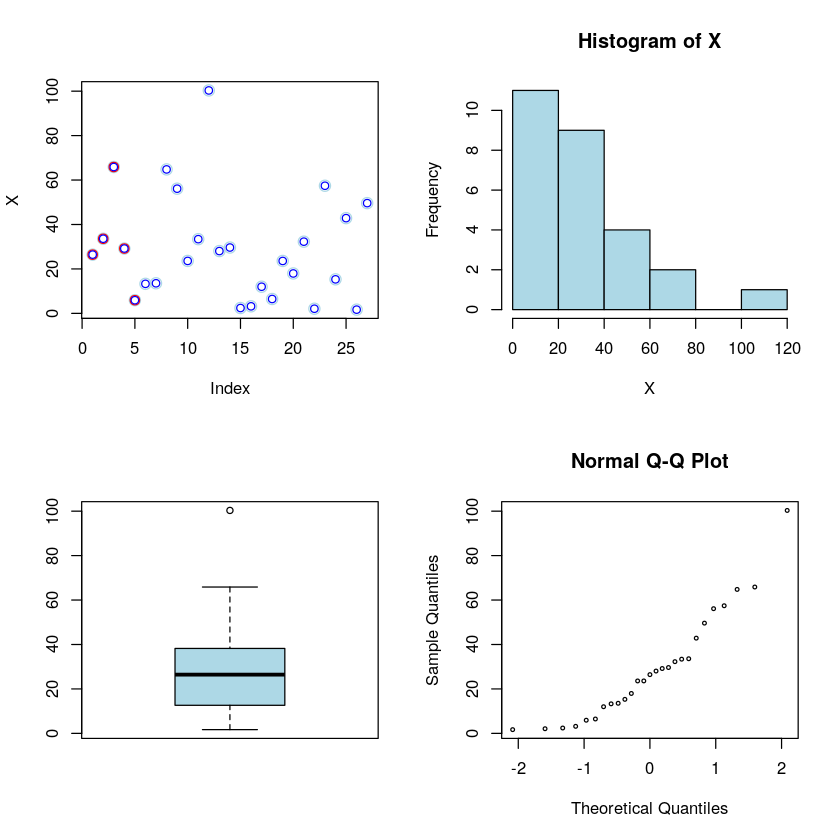

In [16]:
par(mfrow=c(2,2))
plot(X, col="lightblue", cex=1.5)
X_5<-head(X,5)
points(X_5, col="red", cex=1.25)
points(X, col="blue")

hist(X, col="lightblue")

boxplot(X, col="lightblue")

qqnorm(X, col="black", cex=0.5)

In [ ]:
X = c(210, 197, 187, 217, 194,
      208, 220, 199, 193, 203,
      181, 212, 188, 196, 185)

Estimador de **Máxima Verosimilitud** de la **Media** $\mu$:

$$\hat \mu_{MV} = \frac {\sum_{i=1}^n X_i} n$$

# Si distribucion es normal
estimadorMediaMV <- function(x){
    n <- length(x)
    mu_hat <- sum(x)/n
    return (mu_hat)
}

estimadorVarMV <- function(x){
    n <- length(x)
    mu_hat <- estimadorMediaMV(x)
    var_hat <- sum((x - mu_hat)**2)/n
    return (var_hat)
}

estimadorVarMVInsesgado <- function(x){
    n <- length(x)
    mu_hat <- estimadorMediaMV(x)
    var_hat <- sum((x - mu_hat)**2)/(n-1)
    return (var_hat)
}

estimadorVarMVInsesgadoConMu <- function(x, mu){
    n <- length(x)
    var_hat <- sum((x - mu)**2)/(n-1)
    return (var_hat)
}
estimadorVarMVInsesgadoConMu(X, mu=12)
var(X)

In [ ]:
# Ejr parcial intervalos
# calcular IC para una Bernoulli
IC_der<- 39/100 + (0.5/sqrt(100))*qnorm(0.25/2)*(-1)
IC_izq<- 39/100 - (0.5/sqrt(100))*qnorm(0.25/2)*(-1)

# encontrar el n tal que sea mayor que 0.01
(qnorm(0.25/2)*(-1)/0.01)**2